# 결정 트리(Decision Tree)

In [13]:
import pandas as pd


In [27]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error


In [60]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["axes.unicode_minus"] = False

In [3]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state = 11
)

In [8]:
dt_clf = DecisionTreeClassifier(random_state= 156)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [16]:
df_참외_메론_수박_raw = pd.read_csv("C:/R_project/Team_complete/data/feature-target/참외_메론_수박.csv")
df_참외_메론_수박_raw.head()

,date,?�균기온,최�?기온,최고기온,?�강?�량,?�균?�슬?�온??최소?��??�도,?�균?��??�도,?�계?�조?�간,?�계?�사???�균지면온???�계?�?�증발량,?�계?�형증발??참외_메론_?�박,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,2018-01-01T00:00:00Z,-1.3,-5.1,3.8,0.0,-13.9,19,39.1,8.3,6.14,-1.7,1.1,1.6,33.917269
1,2018-01-02T00:00:00Z,-1.8,-4.3,1.8,0.0,-14.1,19,42.0,7.9,5.36,-2.3,1.3,1.9,41.488425
2,2018-01-03T00:00:00Z,-4.7,-7.1,-0.4,0.0,-15.8,28,42.3,8.6,6.56,-3.4,1.0,1.5,43.856918
3,2018-01-04T00:00:00Z,-4.7,-8.7,-0.7,0.0,-15.6,31,43.0,6.2,4.73,-3.3,0.8,1.1,45.116034
4,2018-01-05T00:00:00Z,-3.0,-5.6,1.6,0.0,-12.5,32,48.4,8.2,5.96,-2.6,0.9,1.3,41.545074


In [21]:
#02. 날자 제거하기. 
df_참외_메론_수박 = df_참외_메론_수박_raw
del df_참외_메론_수박['date']
df_참외_메론_수박

,?�균기온,최�?기온,최고기온,?�강?�량,?�균?�슬?�온??최소?��??�도,?�균?��??�도,?�계?�조?�간,?�계?�사???�균지면온???�계?�?�증발량,?�계?�형증발??참외_메론_?�박,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,-1.3,-5.1,3.8,0.0,-13.9,19,39.1,8.3,6.14,-1.7,1.1,1.6,33.917269
1,-1.8,-4.3,1.8,0.0,-14.1,19,42.0,7.9,5.36,-2.3,1.3,1.9,41.488425
2,-4.7,-7.1,-0.4,0.0,-15.8,28,42.3,8.6,6.56,-3.4,1.0,1.5,43.856918
3,-4.7,-8.7,-0.7,0.0,-15.6,31,43.0,6.2,4.73,-3.3,0.8,1.1,45.116034
4,-3.0,-5.6,1.6,0.0,-12.5,32,48.4,8.2,5.96,-2.6,0.9,1.3,41.545074
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,-1.7,-4.6,2.6,0.0,-12.4,23,45.4,9.0,10.36,-0.9,1.5,2.2,39.517816
726,1.1,-3.6,6.1,0.0,-9.0,34,47.6,5.8,8.09,-0.7,1.4,2.0,37.854987
727,3.8,1.1,6.2,1.4,-5.4,37,52.5,0.0,3.28,1.7,1.1,1.6,39.408469
728,2.7,-5.7,6.8,0.4,-2.3,43,70.3,0.0,2.24,3.3,0.9,1.3,42.521593


In [28]:
#03. 데이터셋 스케일링하기. 
scaler = StandardScaler()
df_참외_메론_수박_scaling = scaler.fit_transform(df_참외_메론_수박.iloc[:,:-1])
df_참외_메론_수박_scaling = pd.DataFrame(df_참외_메론_수박_scaling, columns=['평균기온','최저기온','최고기온','일강수량','평균이슬점온도','최소상대습도','평균상대습도','합계일조시간','합계일사량','평균지면온도','합계대형증발량','합계소형증발량'])

df_참외_메론_수박_scaling['참외_메론_수박'] = df_참외_메론_수박.iloc[:,-1].round().astype('int')
df_참외_메론_수박_scaling

,평균기온,최저기온,최고기온,일강수량,평균이슬점온도,최소상대습도,평균상대습도,합계일조시간,합계일사량,평균지면온도,합계대형증발량,합계소형증발량,참외_메론_수박
0,-1.345873,-1.296793,-1.316587,-0.290113,-1.449840,-1.087268,-1.183451,0.322310,-1.072483,-1.405386,-1.062767,-1.052238,34
1,-1.391963,-1.223715,-1.498441,-0.290113,-1.465927,-1.087268,-0.993211,0.221771,-1.181541,-1.455957,-0.938556,-0.921795,41
2,-1.659281,-1.479489,-1.698481,-0.290113,-1.602662,-0.479323,-0.973531,0.397714,-1.013759,-1.548669,-1.124872,-1.095719,44
3,-1.659281,-1.625646,-1.725759,-0.290113,-1.586575,-0.276675,-0.927611,-0.205519,-1.269627,-1.540241,-1.249083,-1.269643,45
4,-1.502577,-1.342467,-1.516626,-0.290113,-1.337235,-0.209125,-0.573371,0.297175,-1.097650,-1.481242,-1.186977,-1.182681,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,-1.382745,-1.251119,-1.425699,-0.290113,-1.329192,-0.817070,-0.770171,0.498252,-0.482447,-1.337959,-0.814345,-0.791353,40
726,-1.124644,-1.159771,-1.107455,-0.290113,-1.055722,-0.074027,-0.625851,-0.306058,-0.799836,-1.321102,-0.876451,-0.878315,38
727,-0.875762,-0.730435,-1.098362,-0.153897,-0.766166,0.128621,-0.304411,-1.763871,-1.472364,-1.118820,-1.062767,-1.052238,39
728,-0.977158,-1.351602,-1.043806,-0.251194,-0.516827,0.533918,0.863269,-1.763871,-1.617776,-0.983966,-1.186977,-1.182681,43


In [90]:
df_참외_메론_수박_scaling.iloc[:,-1]

0      34
1      41
2      44
3      45
4      42
       ..
725    40
726    38
727    39
728    43
729    36
Name: 참외_메론_수박, Length: 730, dtype: int32

In [141]:
#05. train, test 데이터셋으로 분할하기. 
X_train, X_test, y_train, y_test = train_test_split(
    df_참외_메론_수박_scaling.iloc[:,:-1], df_참외_메론_수박_scaling.iloc[:,-1], test_size=0.5 
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((365, 12), (365, 12), (365,), (365,))

In [84]:
#(1) 모형 생성하기. 
lgb_clf = LGBMClassifier()

#(2) 하이퍼 파라미터 확인하기. 
lgb_rg.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

## 모델 시각화

In [43]:
df_참외_메론_수박_scaling.columns

Index(['평균기온', '최저기온', '최고기온', '일강수량', '평균이슬점온도', '최소상대습도', '평균상대습도', '합계일조시간',
       '합계일사량', '평균지면온도', '합계대형증발량', '합계소형증발량', '참외_메론_수박'],
      dtype='object')

In [138]:
df_참외_메론_수박_scaling['참외_메론_수박'].values

array([ 34,  41,  44,  45,  42,  47,  46,  49,  45,  46,  47,  50,  47,
        45,  39,  55,  47,  44,  47,  51,  48,  49,  51,  46,  46,  55,
        41,  44,  45,  47,  43,  46,  44,  48,  41,  44,  59,  48,  46,
        41,  43,  41,  44,  46,  41,  41,  45,  42,  42,  45,  46,  46,
        51,  51,  47,  46,  45,  54,  48,  47,  47,  46,  45,  51,  52,
        56,  56,  55,  53,  57,  55,  56,  56,  58,  59,  57,  52,  58,
        57,  59,  55,  57,  56,  55,  54,  55,  58,  55,  57,  54,  60,
        59,  64,  57,  60,  59,  58,  60,  67,  67,  74,  72,  72,  67,
        70,  73,  78,  75,  82,  88,  94, 103,  91,  91, 101,  99,  95,
       102, 103, 118, 106, 116, 119, 126, 106, 110, 133, 125, 136, 138,
       158, 142, 150, 148, 178, 171, 175, 169, 160, 169, 165, 175, 187,
       199, 206, 198, 200, 212, 232, 214, 219, 237, 253, 253, 264, 249,
       252, 246, 251, 237, 230, 231, 248, 236, 242, 246, 250, 269, 276,
       263, 269, 302, 292, 316, 325, 342, 305, 283, 258, 287, 29

### 5개로 나누기
for i in range(len(df_참외_메론_수박_scaling['참외_메론_수박'].values)):
    if df_참외_메론_수박_scaling['참외_메론_수박'].values[i] < 

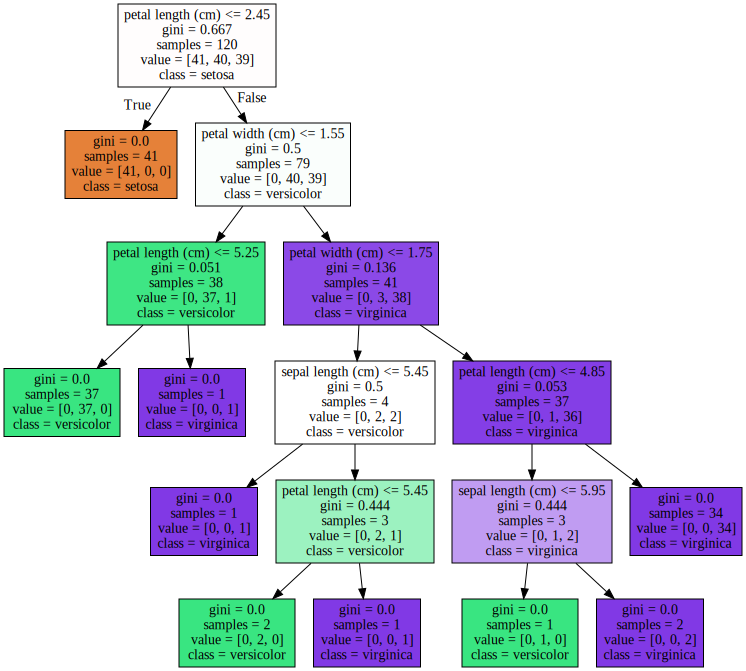

In [134]:
# 의사 결정 나무 
from sklearn.tree import export_graphviz
export_graphviz(
    dt_clf, out_file= 'tree.dot',
    class_names = iris.target_names,
    feature_names= iris.feature_names,
    impurity= True, filled=True 
)
import graphviz

with open('tree.dot','r') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [117]:
    class_names = df_참외_메론_수박_scaling.columns,
    feature_names= df_참외_메론_수박_scaling['참외_메론_수박'].values,

In [66]:
from lightgbm import LGBMRegressor
from lightgbm import LGBMClassifier
from lightgbm import plot_tree
import lightgbm as lgb

In [94]:
lgb_clf = lgb.LGBMClassifier()
lgb_clf.fit(df_참외_메론_수박_scaling.iloc[:,:-1], df_참외_메론_수박_scaling.iloc[:,-1])

LGBMClassifier()

In [139]:
import matplotlib.pyplot as plt
fig2 = plt.figure(figsize=(20, 20))
ax = fig2.subplots()
lgb.plot_tree(lgb_clf, tree_index=1, ax=ax)
plt.show()

ImportError: You must install graphviz to plot tree.

In [109]:
df_참외_메론_수박_scaling.columns[:]

Index(['평균기온', '최저기온', '최고기온', '일강수량', '평균이슬점온도', '최소상대습도', '평균상대습도', '합계일조시간',
       '합계일사량', '평균지면온도', '합계대형증발량', '합계소형증발량', '참외_메론_수박'],
      dtype='object')

In [110]:
df_참외_메론_수박_scaling.columns[:-1]

Index(['평균기온', '최저기온', '최고기온', '일강수량', '평균이슬점온도', '최소상대습도', '평균상대습도', '합계일조시간',
       '합계일사량', '평균지면온도', '합계대형증발량', '합계소형증발량'],
      dtype='object')